In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [1]:
1 + 1

2

In [4]:
%whos

Interactive namespace is empty.


In [2]:
input_df = pd.read_csv('data_sample.csv')
input_df = input_df.drop(['Unnamed: 0'],axis=1)

In [3]:
input_df.shape

(23242, 9)

In [4]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1


In [18]:
input_df[input_df['view_percent']>300]

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence
10008,b,ep00001001,s00000099,uu00000084,2024-02-07,2024-02-07 12:48:32,2024-02-07 12:50:29,350.000,3
10312,b,ep00001111,s00000099,uu00000084,2024-02-13,2024-02-13 12:54:20,2024-02-13 12:56:34,312.500,5
10315,b,ep00001112,s00000099,uu00000084,2024-02-14,2024-02-14 12:51:35,2024-02-14 12:54:06,306.250,6
12143,b,ep00002258,s00000159,uu00000155,2024-03-04,2024-03-04 22:41:37,2024-03-04 22:43:17,357.143,3
20136,b,ep00006546,s00000334,uu00000723,2024-03-08,2024-03-08 14:15:11,2024-03-08 14:20:06,414.286,5
20138,b,ep00006548,s00000334,uu00000723,2024-03-08,2024-03-08 14:53:18,2024-03-08 15:00:27,495.238,5
21725,c,ep00002233,s00000139,uu00000810,2024-03-04,2024-03-04 21:42:53,2024-03-04 21:45:59,333.333,3


In [19]:
input_df.columns

Index(['episode_type', 'episode_id', 'show_id', 'user_id', 'log_date',
       'view_start_time', 'view_end_time', 'view_percent', 'log_day_sequence'],
      dtype='object')

In [20]:
input_df[input_df['user_id'].isna()].shape[0]/input_df.shape[0]*100

0.030117890026675847

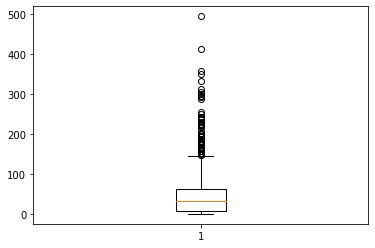

In [21]:
plt.boxplot(input_df['view_percent'].values)
plt.show()

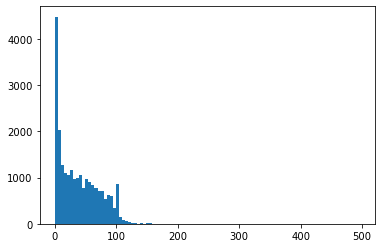

In [22]:
plt.hist(input_df['view_percent'].values,bins=100)
plt.show()

In [23]:
# tranform 

In [24]:
input_df['view_start_time'] = pd.to_datetime(input_df['view_start_time'])
input_df['view_end_time'] = pd.to_datetime(input_df['view_end_time'])
input_df['view_duration(s)'] = input_df['view_end_time'] - input_df['view_start_time']

In [25]:
input_df['view_duration(s)'] = input_df['view_duration(s)'].dt.total_seconds().astype(int)

In [26]:
def convert_string_to_date_time(date_str):
    date_ = datetime.strptime(date_str, '%Y-%m-%d').date()

    
    return date_


def get_year(x):
    return x.year

def get_month(x):
    return x.month

def get_day(x):
    return x.day




In [27]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s)
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29


In [28]:
input_df['log_date_dt']=  input_df['log_date'].apply(convert_string_to_date_time)
input_df['log_date_year'] = input_df['log_date_dt'].apply(get_year)
input_df['log_date_month'] = input_df['log_date_dt'].apply(get_month)
input_df['log_date_day'] = input_df['log_date_dt'].apply(get_day)

In [29]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [30]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23242 entries, 0 to 23241
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   episode_type      23242 non-null  object        
 1   episode_id        23242 non-null  object        
 2   show_id           23242 non-null  object        
 3   user_id           23235 non-null  object        
 4   log_date          23242 non-null  object        
 5   view_start_time   23242 non-null  datetime64[ns]
 6   view_end_time     23242 non-null  datetime64[ns]
 7   view_percent      23242 non-null  float64       
 8   log_day_sequence  23242 non-null  int64         
 9   view_duration(s)  23242 non-null  int64         
 10  log_date_dt       23242 non-null  object        
 11  log_date_year     23242 non-null  int64         
 12  log_date_month    23242 non-null  int64         
 13  log_date_day      23242 non-null  int64         
dtypes: datetime64[ns](2), 

In [31]:
input_df.describe()

,view_percent,log_day_sequence,view_duration(s),log_date_year,log_date_month,log_date_day
count,23242.000000,23242.000000,23242.000000,23242.0,23242.000000,23242.000000
mean,38.589494,6.801093,102.191765,2024.0,2.434902,14.848636
std,34.070387,6.853440,175.567702,0.0,0.496102,8.474620
min,0.000000,1.000000,0.000000,2024.0,2.000000,1.000000
25%,7.692000,1.000000,34.000000,2024.0,2.000000,7.000000
50%,32.126500,4.000000,83.000000,2024.0,2.000000,15.000000
75%,63.158000,10.000000,139.000000,2024.0,3.000000,22.000000
max,495.238000,32.000000,15562.000000,2024.0,4.000000,31.000000


In [32]:
input_df.describe(include=['O'])

,episode_type,episode_id,show_id,user_id,log_date,log_date_dt
count,23242,23242,23242,23235,23242,23242
unique,3,7275,384,999,61,61
top,b,ep00000005,s00000004,uu00000043,2024-03-03,2024-03-03
freq,13685,409,2258,1226,854,854


In [33]:
input_df.describe(include=['O'])

,episode_type,episode_id,show_id,user_id,log_date,log_date_dt
count,23242,23242,23242,23235,23242,23242
unique,3,7275,384,999,61,61
top,b,ep00000005,s00000004,uu00000043,2024-03-03,2024-03-03
freq,13685,409,2258,1226,854,854


In [49]:
tmp = input_df[['user_id','log_date','log_day_sequence']].drop_duplicates()

In [50]:
tmp.shape

(2937, 3)

In [52]:
tmp[tmp['log_day_sequence']==1].shape

(1000, 3)

In [34]:
first_user = input_df[['user_id','log_date']].drop_duplicates()

In [43]:
first_user.shape

(2937, 3)

In [35]:
first_user.head()

,user_id,log_date
0,uu00000002,2024-02-01
1,uu00000016,2024-02-02
2,uu00000049,2024-02-03
3,uu00000050,2024-02-03
5,uu00000056,2024-02-04


In [45]:
first_user['user_id'].nunique()

999

In [ ]:
#u 1 === u => 4 
#u 3 
#u 2
#x 1 ==== ppp 1
#w 1
#w 2
#w 3

In [36]:
first_user['count']=1

In [37]:
first_userg = first_user[['user_id','count']].groupby(['user_id']).sum().reset_index()

In [44]:
first_userg .shape

(30, 2)

In [38]:
first_userg = first_userg['count'].value_counts().reset_index().rename(columns={'index':'user_loging_per_day'})

In [48]:
first_userg 

,user_loging_per_day,count
0,1,612
1,2,158
2,3,58
3,4,34
4,5,18
5,6,14
6,8,13
7,10,11
8,7,10
9,12,7


In [46]:
first_userg[first_userg['user_loging_per_day']==1]

,user_loging_per_day,count
0,1,612


In [47]:
first_userg[first_userg['user_loging_per_day']==1]['count']

0    612
Name: count, dtype: int64

In [42]:
first_userg['count'].sum()

999

In [40]:
first_userg[first_userg['user_loging_per_day']==1]['count'].sum()/first_userg['count'].sum()

0.6126126126126126

In [22]:
first_userg

,user_loging_per_day,count
0,1,612
1,2,158
2,3,58
3,4,34
4,5,18
5,6,14
6,8,13
7,10,11
8,7,10
9,12,7


In [23]:
# plt.subplots(figsize=(8, 6)) 
# plt.bar(first_userg['user_loging_per_day'], first_userg['count'])

# # Add labels and title
# plt.xlabel('Values')
# plt.ylabel('Categories')
# plt.title('Horizontal Bar Plot')

In [24]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [25]:
input_df[input_df['view_percent']==0]

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.0,1,14,2024-02-01,2024,2,1
6,a,ep00000002,s00000002,uu00000072,2024-02-04,2024-02-04 13:13:39,2024-02-04 13:14:04,0.0,1,25,2024-02-04,2024,2,4
7,a,ep00000002,s00000002,uu00000079,2024-02-05,2024-02-05 20:43:55,2024-02-05 20:44:00,0.0,1,5,2024-02-05,2024,2,5
14,a,ep00000002,s00000002,uu00000143,2024-02-08,2024-02-08 11:03:24,2024-02-08 11:03:31,0.0,1,7,2024-02-08,2024,2,8
18,a,ep00000002,s00000002,uu00000169,2024-03-07,2024-03-07 15:20:34,2024-03-07 15:20:39,0.0,2,5,2024-03-07,2024,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23130,c,ep00007177,s00000165,uu00000962,2024-03-24,2024-03-24 13:11:19,2024-03-24 13:11:54,0.0,3,35,2024-03-24,2024,3,24
23131,c,ep00007178,s00000165,uu00000962,2024-03-23,2024-03-23 16:09:24,2024-03-23 16:10:11,0.0,2,47,2024-03-23,2024,3,23
23144,c,ep00007185,s00000165,uu00000962,2024-03-24,2024-03-24 09:56:37,2024-03-24 09:56:52,0.0,3,15,2024-03-24,2024,3,24
23184,c,ep00007209,s00000163,uu00000962,2024-03-24,2024-03-24 22:36:26,2024-03-24 22:36:42,0.0,3,16,2024-03-24,2024,3,24


In [26]:
input_df['episode_type'].nunique(), input_df['episode_id'].nunique(), input_df['show_id'].nunique()

(3, 7275, 384)

In [ ]:
# What is the similarities
# between users currently loggin in more than once?
# input_df for at least one time 

In [27]:
feature_key = input_df[['episode_type','episode_id','show_id']].drop_duplicates().reset_index(drop=True)

In [28]:
feature_key.shape

(7762, 3)

In [29]:
feature_key.head()

,episode_type,episode_id,show_id
0,a,ep00000002,s00000002
1,a,ep00000003,s00000003
2,a,ep00000004,s00000003
3,a,ep00000005,s00000004
4,a,ep00000007,s00000004


In [32]:
user_unique = input_df['user_id'].unique()

In [33]:
new_user_list =[]

for user in tqdm(user_unique):
    
    new_tmp = feature_key.copy()
    new_tmp['user_id'] = user
    
    new_user_list.append(new_tmp)
    
    
new_user_df = pd.concat(new_user_list)

100%|██████████| 1000/1000 [00:02<00:00, 383.09it/s]


In [34]:
new_user_df.head()

,episode_type,episode_id,show_id,user_id
0,a,ep00000002,s00000002,uu00000002
1,a,ep00000003,s00000003,uu00000002
2,a,ep00000004,s00000003,uu00000002
3,a,ep00000005,s00000004,uu00000002
4,a,ep00000007,s00000004,uu00000002


In [35]:
new_user_df.shape

(7762000, 4)

In [36]:
999*7762

7754238

In [37]:
new_user_df = pd.merge(new_user_df,
                       input_df[['episode_type','episode_id','show_id','user_id','view_percent']], # add filter here 
                       on = ['episode_type','episode_id','show_id','user_id'],
                       how ='left'
                      )

In [38]:
new_user_df['view_percent'] = new_user_df['view_percent'].fillna(0)

In [39]:
new_user_df.shape

(7768240, 5)

In [40]:
new_user_df .head()

,episode_type,episode_id,show_id,user_id,view_percent
0,a,ep00000002,s00000002,uu00000002,0.0
1,a,ep00000003,s00000003,uu00000002,0.0
2,a,ep00000004,s00000003,uu00000002,0.0
3,a,ep00000005,s00000004,uu00000002,0.0
4,a,ep00000007,s00000004,uu00000002,0.0


In [68]:
first_time_users = input_df[input_df['log_day_sequence']==1]['user_id'].unique()
first_time_more = input_df[input_df['log_day_sequence']>2]['user_id'].unique()

In [ ]:
# new_user_f = new_user_df [new_user_df ['user_id'].isin(first_time_users)]
# new_user_sec = new_user_df [new_user_df ['user_id'].isin(first_time_sec)]

In [60]:
# new_user_df[new_user_df['view_percent']>0]['user_id'].unique()

In [94]:
user_unique[:2]

array(['uu00000002', 'uu00000016'], dtype=object)

In [55]:
user_a = new_user_df[new_user_df['user_id']=='uu00000047']
user_b = new_user_df[new_user_df['user_id']=='uu00000016']

In [53]:
user_a.shape,user_b.shape

((7762, 5), (7762, 5))

In [56]:
user_a[user_a['view_percent']>0].shape,user_b[user_b['view_percent']>0].shape

((4, 5), (7, 5))

In [57]:


def cosine_sim(a, b):
    # if
    """Calculates the cosine similarity between two vectors."""
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# # Example usage
# vector1 = [1, 2, 3]
# vector2 = [4, 5, 6]

# similarity = cosine_sim(vector1, vector2)
# print("Cosine similarity:", similarity)

In [58]:
cosine_sim(user_a['view_percent'].to_list(), user_b['view_percent'].to_list())

0.0319533289563173

In [59]:
# from sklearn.metrics.pairwise import cosine_similarity

# vector1 = [[1, 2, 3]]  # Note: 2D array required for sklearn
# vector2 = [[4, 5, 6]]

# similarity = cosine_similarity(vector1, vector2)
# print("Cosine similarity:", similarity[0][0])

In [ ]:
user_aa = []
user_bb = []
simi_l = []

for user_a in user_with_one_time:
    for user_b in all_users_id:
        sim = cosine_sim(user_a['view_percent'].to_list(), user_b['view_percent'].to_list())
        user_aa.append(user_a)
        user_bb.append(user_b)
        simi_l.append(simi_l)

df_simi = pd.DataFrame({'user_id_a':user_aa,'user_id_b':user_bb, 'cos_sim':simi_l})

In [ ]:
user_a, user_b so similar

In [ ]:
user_a = [1,0,0,0,0,1]'view_percent_a'
user_b = [1,1,0,0,0,1]'view_percent_b'
user a go and watch second item 

In [ ]:
for the most similair users 
user_a = new_user_df[new_user_df['user_id']=='uu00003']
user_b = new_user_df[new_user_df['user_id']=='uu00100']

In [ ]:
user_similarity_per_user = pd.mrege(user_a,user_b, on = ['episode_type','episode_id','show_id'])

In [ ]:
['episode_type','episode_id','show_id', 'user_a','user_b','view_percent_a','view_percent_b']

In [72]:
feature_key_m

,episode_type,episode_id,show_id,user_id,view_percent
0,a,ep00000002,s00000002,uu00000002,0.000
1,a,ep00000002,s00000002,uu00000016,9.091
2,a,ep00000002,s00000002,uu00000049,9.091
3,a,ep00000002,s00000002,uu00000050,27.273
4,a,ep00000002,s00000002,uu00000050,9.091
...,...,...,...,...,...
23237,c,ep00007268,s00000113,uu00000987,82.609
23238,c,ep00007269,s00000113,uu00000987,85.000
23239,c,ep00007270,s00000113,uu00000987,68.421
23240,c,ep00007271,s00000113,uu00000987,63.158


In [ ]:
input_df.shap

In [31]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [ ]:
# - show level
# - user level
# eposod level 

In [ ]:
# most popular emposiod , most click one 

In [40]:
input_df[['episode_type','episode_id','show_id','view_percent']].groupby(['episode_type','episode_id','show_id']).sum().reset_index().sort_values(['view_percent'],ascending=False)

,episode_type,episode_id,show_id,view_percent
5,a,ep00000008,s00000004,8910.516
3,a,ep00000005,s00000004,5833.351
4,a,ep00000007,s00000004,5705.241
1451,b,ep00000006,s00000004,5547.635
30,a,ep00000075,s00000002,3847.061
...,...,...,...,...
726,a,ep00002991,s00000182,0.000
2735,b,ep00002001,s00000142,0.000
2736,b,ep00002002,s00000142,0.000
728,a,ep00002993,s00000182,0.000


In [ ]:
# user engagement per day over all

In [42]:
input_df[['user_id','view_duration(s)']].groupby(['user_id']).sum().reset_index().sort_values(['view_duration(s)'],ascending=False)

,user_id,view_duration(s)
41,uu00000043,212974
461,uu00000463,106094
467,uu00000469,74312
390,uu00000392,60356
259,uu00000261,51710
...,...,...
414,uu00000416,3
431,uu00000433,2
347,uu00000349,0
532,uu00000534,0


In [ ]:
# what is most popular episode_type	

In [46]:
input_df[['episode_type','view_percent']].groupby(['episode_type']).sum().reset_index().sort_values(['view_percent'],ascending=False)

,episode_type,view_percent
1,b,555682.199
0,a,247143.086
2,c,94071.723


0.2576800619568023

In [47]:
input_df['log_day_sequence'].value_counts()

1     5989
2     3007
3     2079
4     1441
5     1086
6      988
8      851
7      851
10     728
9      725
11     539
12     505
13     448
14     431
15     406
17     380
18     337
16     325
20     310
21     308
19     269
23     253
22     242
25     162
24     161
26     118
27     116
28      81
29      65
31      21
32      18
30       2
Name: log_day_sequence, dtype: int64

In [ ]:
# What is the similarities
# between users currently loggin in more than once?

In [61]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [62]:
once = input_df[input_df['log_day_sequence']>1]

In [63]:
once .head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
17,a,ep00000002,s00000002,uu00000169,2024-03-07,2024-03-07 14:06:04,2024-03-07 14:07:06,9.091,2,62,2024-03-07,2024,3,7
18,a,ep00000002,s00000002,uu00000169,2024-03-07,2024-03-07 15:20:34,2024-03-07 15:20:39,0.000,2,5,2024-03-07,2024,3,7
20,a,ep00000002,s00000002,uu00000190,2024-03-08,2024-03-08 16:42:01,2024-03-08 16:43:50,50.000,2,109,2024-03-08,2024,3,8
22,a,ep00000002,s00000002,uu00000212,2024-02-17,2024-02-17 17:01:59,2024-02-17 17:03:30,27.273,3,91,2024-02-17,2024,2,17
25,a,ep00000002,s00000002,uu00000261,2024-02-19,2024-02-19 00:47:21,2024-02-19 00:49:31,45.455,8,130,2024-02-19,2024,2,19


In [66]:
once[['episode_type','episode_id','show_id','view_duration(s)']].groupby(['episode_type','episode_id','show_id']).mean().reset_index().sort_values(['view_duration(s)'],ascending=False)

,episode_type,episode_id,show_id,view_duration(s)
4670,b,ep00005404,s00000032,2244.500000
6572,c,ep00006357,s00000009,2034.000000
5603,b,ep00006917,s00000189,849.000000
124,a,ep00000404,s00000050,765.333333
4468,b,ep00005092,s00000248,731.000000
...,...,...,...,...
574,a,ep00003169,s00000162,0.000000
6604,c,ep00006438,s00000241,0.000000
478,a,ep00002963,s00000175,0.000000
83,a,ep00000253,s00000034,0.000000


In [69]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


# feature enginering

In [96]:
from sklearn import base
import numpy as np
import pandas as pd

class CatDummyTransfrom(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, colnames, discard_original_col=False, dummy_trap = False):
        self.colnames = colnames
        self.discard_original_col = discard_original_col
        self.dummy_trap = dummy_trap

    def fit(self, X, y=None):
        return self


    def transform(self,X):
        # Get dummies and save them inside a new DataFrame
        tem = pd.get_dummies(X[self.colnames])

        if (self.dummy_trap==False) and (self.discard_original_col==True):

            X= X.drop(self.colnames, axis=1)
            # Join the new dataframe
            X = X.join(tem)

        elif (self.dummy_trap==True) and (self.discard_original_col==False):
            """
                This is not always necessary, but the idea is that if the categorical attribute covers
                all the space (i.e. your dummy variables represent all the possible values for the attribute),
                then the last dummy variable can be perfectly predicted by the other N-1 dummies:

                last_dummy = 1 if all sum(dummies[:N-1]) == 0 else 0

                This introduces a heavy collinearity between your dummy variables (which is a very undesirable
                thing in linear/logistic regression) and that's why it is called dummy variable trap.

                Usually, the way of fixing this this problem is to just remove the one dummy column (any would do,
                it does not have to be the last one). This removes the source of collinearity and, since the dummy
                could be predicted by the rest anyway, there is no loss of information at all from the original dataset.
            """
            tem = tem.drop(tem.columns[-1], axis=1)
            X = X.join(tem)

        elif (self.dummy_trap==True) and (self.discard_original_col==True):

            tem = tem.drop(tem.columns[-1], axis=1)
            X= X.drop(self.colnames, axis=1)
            X = X.join(tem)

        else:
            X = X.join(tem)

        return X


In [102]:
class RawMeanEncoding(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, colnames,targetName):
        self.colnames = colnames
        self.targetName = targetName

    def fit(self, X, y=None):
        return self


    def transform(self,X):

        assert(type(self.targetName) == str)
        assert(type(self.colnames) == list)

        mean_of_target = X[self.targetName].mean()

        for col in self.colnames:

            col_mean_name = col + '_' + 'RawMeanEnc'

            X[col_mean_name] = X.groupby(col)[self.targetName].transform('mean')
            # Fill NANs
            X[col_mean_name].fillna(mean_of_target, inplace=True)

        return X

In [112]:
from sklearn import base
import pandas as pd
import numpy as np

class FrequencyEncoding(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, colnames, discard_original_col):
        self.colnames = colnames
        self.discard_original_col = discard_original_col


    def fit(self, X, y=None):
        return self


    def transform(self,X):

        result_train_df=pd.DataFrame()

        for col in self.colnames:
            col_freq=col+'_freq'
            #
            freq=X[col].value_counts()
            freq=pd.DataFrame(freq)
            freq.reset_index(inplace=True)
            freq.columns=[col,col_freq]

            #
            temp_train_df=pd.merge(X[[col]], freq, how='left', on=col)
            temp_train_df.drop([col], axis=1, inplace=True)

            if result_train_df.shape[0]==0:
                result_train_df=temp_train_df

            else:
                result_train_df = pd.concat([result_train_df, temp_train_df],axis=1)


        if self.discard_original_col:

            df = pd.concat([X, result_train_df], axis=1)
            df = df.drop(self.colnames, axis=1)

        else:
            df = pd.concat([X, result_train_df], axis=1)

        return df


In [95]:
df_all = input_df.copy()

In [130]:
df_all.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [140]:
train_1 = CatDummyTransfrom(colnames='episode_type').fit_transform(df_all)
train_1 = CatDummyTransfrom(colnames='episode_id').fit_transform(train_1)
train_1 = CatDummyTransfrom(colnames='show_id').fit_transform(train_1)

In [141]:
key_cols = train_1[['episode_type','episode_id','show_id','user_id']]

In [142]:
train_1 = train_1.drop(['user_id','episode_type','episode_id',
                        'show_id','view_start_time','view_end_time',
                        'view_end_time','log_date','log_date_dt'],axis=1)

In [143]:
train_1 .shape

(23242, 7668)

In [144]:
train_1[train_1.columns[:20]].head()

,view_percent,log_day_sequence,view_duration(s),log_date_year,log_date_month,log_date_day,a,b,c,ep00000002,ep00000003,ep00000004,ep00000005,ep00000006,ep00000007,ep00000008,ep00000009,ep00000010,ep00000011,ep00000012
0,0.000,1,14,2024,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,9.091,1,66,2024,2,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,9.091,1,63,2024,2,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,27.273,1,81,2024,2,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,9.091,1,29,2024,2,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [145]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

In [151]:
indices = [0,116,421]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(train_1.loc[indices], columns = train_1.keys()).reset_index(drop = True)
print ("Chosen samples dataset:")
samples

Chosen samples dataset:


,view_percent,log_day_sequence,view_duration(s),log_date_year,log_date_month,log_date_day,a,b,c,ep00000002,...,s00000376,s00000377,s00000378,s00000379,s00000380,s00000381,s00000382,s00000383,s00000384,s00000385
0,0.000,1,14,2024,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4.762,1,14,2024,2,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000,3,18,2024,3,9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:

# log_data = np.log(train_1)




# log_samples = np.log(samples)

In [172]:
def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


# scale data 

In [174]:
import matplotlib.cm as cm

In [155]:
train_1.isna().sum().sum()

0

In [164]:
from sklearn.decomposition import PCA

pca =  PCA(n_components=6) 
pca.fit(train_1)


pca_samples = pca.transform(samples)
print (samples.shape)
print (pca_samples.shape)
#Generate PCA results plot
# pca_results = pca_results(train_1, pca)

(3, 7668)
(3, 6)


In [166]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(train_1)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(train_1)
# print 'Shape of data before transform:', good_data.shape
# print 'Shape of data after transform: ', reduced_data.shape
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [168]:
from sklearn import mixture 
# model = mixture.GaussianMixture(n_components=3, covariance_type='full')

In [169]:
from sklearn import mixture 
from sklearn.metrics import silhouette_score

def produceGMM(k):
    global clusterer, preds, centers, sample_preds
    
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = mixture.GaussianMixture(n_components=k, random_state=0)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_ 
    
    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,16):
    score = produceGMM(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))


In [170]:
results

Number of Clusters,Silhouette Score
2,0.992935
3,0.428480
4,0.409909
5,0.333510
6,0.331987
7,0.329219
8,0.166133
9,0.161946
10,0.165495
11,0.190692


In [171]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GaussianMixture(n_components=2, random_state=0)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_ 

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
# Print the score result
print ("The silhouette_score is: {}".format(score))

The silhouette_score is: 0.9929354398693594


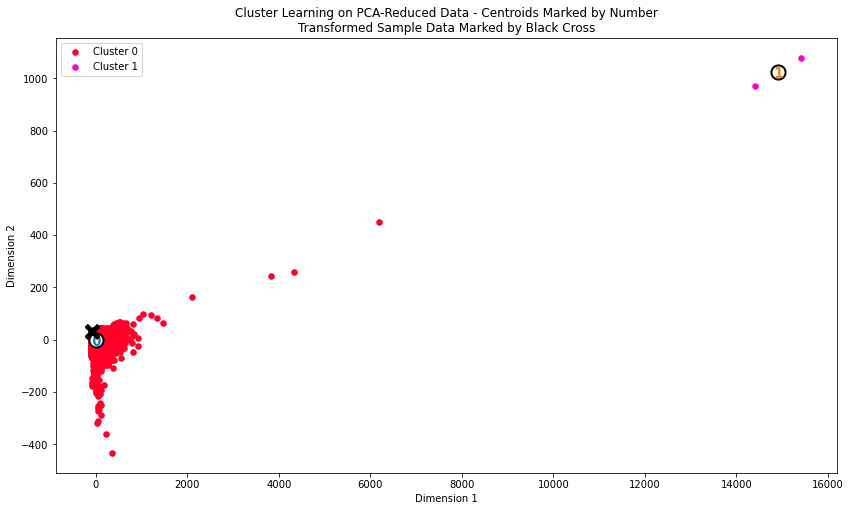

In [175]:
cluster_results(reduced_data, preds, centers, pca_samples)

In [177]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = train.keys())
true_centers.index = segments


<ipython-input-177-ba87516e8b34>:5: RuntimeWarning: overflow encountered in exp
  true_centers = np.exp(log_centers)


In [178]:
true_centers

,view_percent,log_day_sequence,view_duration(s),log_date_year,log_date_month,log_date_day,a,b,c,ep00000002,...,s00000376,s00000377,s00000378,s00000379,s00000380,s00000381,s00000382,s00000383,s00000384,s00000385
Segment 0,5.749293e+16,898.0,6.648220e+43,inf,11.0,2809312.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Segment 1,9.788690e+11,92596.0,inf,inf,14.0,24378257.0,2.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [97]:
df_all.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [100]:
df_all_f1 = CatDummyTransfrom(colnames='episode_type').fit_transform(df_all)

In [104]:
df_all_f2 = RawMeanEncoding(colnames=['episode_type','episode_id','show_id'],targetName='view_percent').fit_transform(df_all_f1 )

In [105]:
df_all_f2.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day,a,b,c,episode_type_RawMeanEnc,episode_id_RawMeanEnc,show_id_RawMeanEnc
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1,1,0,0,35.626796,34.785319,33.98011
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2,1,0,0,35.626796,34.785319,33.98011
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3,1,0,0,35.626796,34.785319,33.98011
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3,1,0,0,35.626796,34.785319,33.98011
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3,1,0,0,35.626796,34.785319,33.98011


In [106]:
df_all_f3 = CatDummyTransfrom(colnames='show_id').fit_transform(df_all_f2)

In [107]:
df_all_f3.shape

(23242, 404)

In [108]:
df_all_f3.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),...,s00000376,s00000377,s00000378,s00000379,s00000380,s00000381,s00000382,s00000383,s00000384,s00000385
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,...,0,0,0,0,0,0,0,0,0,0
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,...,0,0,0,0,0,0,0,0,0,0
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,...,0,0,0,0,0,0,0,0,0,0
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,...,0,0,0,0,0,0,0,0,0,0
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df_all_f4 = FrequencyEncoding(colnames=['episode_type','episode_id','show_id'],discard_original_col=False).fit_transform(df_all_f3)

In [116]:
df_all_f4 .head().

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),...,s00000379,s00000380,s00000381,s00000382,s00000383,s00000384,s00000385,episode_type_freq,episode_id_freq,show_id_freq
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,...,0,0,0,0,0,0,0,6937,72,706
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,...,0,0,0,0,0,0,0,6937,72,706
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,...,0,0,0,0,0,0,0,6937,72,706
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,...,0,0,0,0,0,0,0,6937,72,706
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,...,0,0,0,0,0,0,0,6937,72,706


In [117]:
df_all_f1.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day,a,b,c,episode_type_RawMeanEnc,episode_id_RawMeanEnc,show_id_RawMeanEnc
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1,1,0,0,35.626796,34.785319,33.98011
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2,1,0,0,35.626796,34.785319,33.98011
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3,1,0,0,35.626796,34.785319,33.98011
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3,1,0,0,35.626796,34.785319,33.98011
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3,1,0,0,35.626796,34.785319,33.98011


In [ ]:
train_cols = ['view_percent','log_day_sequence']

In [ ]:
df_all_f4 

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# ['episode_type_label_enc'] = encoder.fit_transform(df['episode_type'])

In [87]:
df = input_df[['user_id','episode_type','view_percent']]#,'log_day_sequence','view_duration(s)','log_date_year','log_date_month']]

<ipython-input-88-28b1808ced0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['episode_type_label_enc'] = encoder.fit_transform(df['episode_type'])


In [89]:
# df

In [90]:
df.head()

,user_id,episode_type,view_percent,episode_type_label_enc
0,uu00000002,a,0.000,0
1,uu00000016,a,9.091,0
2,uu00000049,a,9.091,0
3,uu00000050,a,27.273,0
4,uu00000050,a,9.091,0


In [93]:
df_episod_type_lvl_sum = df[['user_id','episode_type_label_enc','view_percent']].groupby(['user_id','episode_type_label_enc']).sum().reset_index()

In [94]:
df_episod_type_lvl_sum 

,user_id,episode_type_label_enc,view_percent
0,uu00000002,0,0.000
1,uu00000003,0,12.394
2,uu00000004,0,19.549
3,uu00000004,1,14.286
4,uu00000005,0,570.294
...,...,...,...
1721,uu00000997,0,55.890
1722,uu00000997,1,14.286
1723,uu00000998,0,4.762
1724,uu00000999,0,31.250


In [ ]:
# key = In this way, the Data_sample primary key is (user_id&show_id&episode_id&view_start_time)